In [67]:
import numpy as np 
import pandas as pd 

import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from pandas.plotting import lag_plot
from datetime import datetime

# from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error
from pandas_datareader import data

In [68]:
START_DATE = '2020-01-01'
END_DATE = '2020-12-31'
# ASSETS = ['FB', 'TSLA',  'MSFT','AAPL','GOOGL']
ASSETS = ['TSLA']
n_assets = len(ASSETS)

In [69]:
df = data.DataReader(ASSETS, 
                     'yahoo', 
                     start=START_DATE, 
                     end=END_DATE)
df.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2020-01-02,86.052002,86.052002,86.139999,84.342003,84.900002,47660500.0
2020-01-03,88.601997,88.601997,90.800003,87.384003,88.099998,88892500.0
2020-01-06,90.307999,90.307999,90.311996,88.000000,88.094002,50665000.0
2020-01-07,93.811996,93.811996,94.325996,90.671997,92.279999,89410500.0
2020-01-08,98.428001,98.428001,99.697998,93.646004,94.739998,155721500.0


In [70]:
df = df['Adj Close']
df.head()

Symbols,TSLA
Date,
2020-01-02,86.052002
2020-01-03,88.601997
2020-01-06,90.307999
2020-01-07,93.811996
2020-01-08,98.428001


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


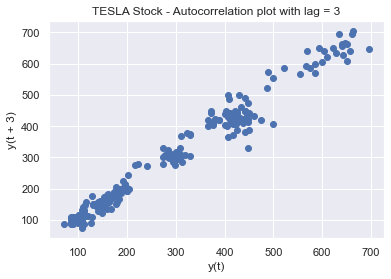

In [71]:
plt.figure()
lag_plot(df, lag=3)
plt.title('TESLA Stock - Autocorrelation plot with lag = 3')
plt.show()

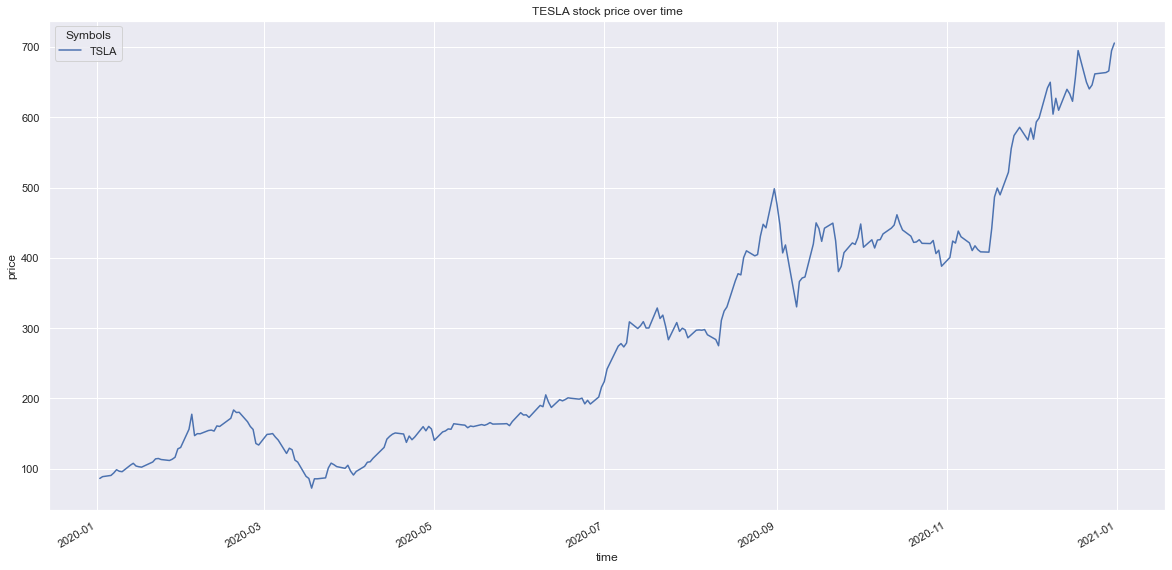

In [72]:
df.plot(figsize=(20,10))
plt.title("TESLA stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [73]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['TSLA'].values
test_data = test_data['TSLA'].values
history = [x for x in training_data]

In [79]:
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 1279.345244159749


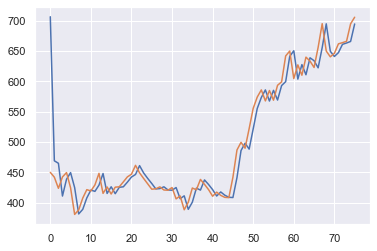

In [86]:
plt.plot(model_predictions)
plt.plot(history[-len(model_predictions):])

In [90]:
np.sqrt(np.sum((np.array(history)[-len(model_predictions):] - model_predictions)[2:-2]**2))

172.16185760020812

<AxesSubplot:ylabel='Density'>

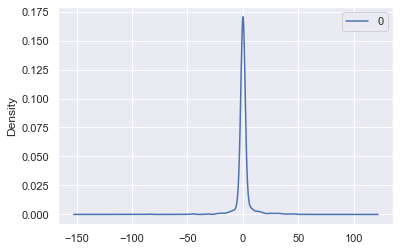

In [45]:
residuals.plot(kind='kde')

In [46]:
print(residuals.describe())

                 0
count  1510.000000
mean      0.421993
std       6.799632
min     -84.095497
25%      -0.811786
50%       0.059579
75%       1.076808
max      53.165649


In [78]:
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(df[:int(len(df)*0.7)].pct_change().dropna(), order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

/opt/miniconda3/envs/mlenv310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/mlenv310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/mlenv310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/mlenv310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer

KeyError: 0

In [10]:
test_df = pd.DataFrame(model_predictions, columns=['prediction'])
test_df['true'] = history[-len(model_predictions):]

In [11]:
test_df.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [26]:
from statsmodels.graphics.tsaplots import plot_acf
# plot_acf(df.price_change)

In [87]:
df['price_change'] = df.TSLA.shift()
df = df.dropna()


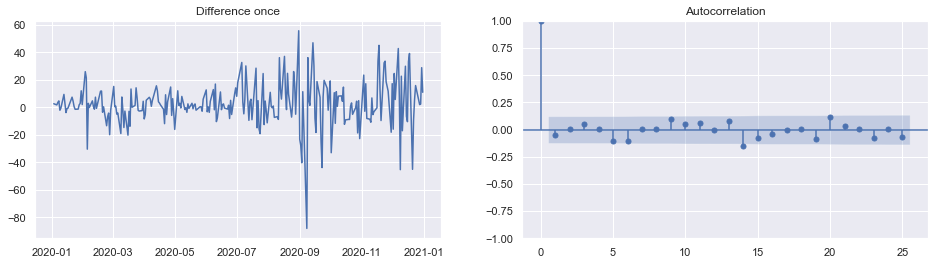

In [27]:
diff = df.TSLA.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2)
plt.show()


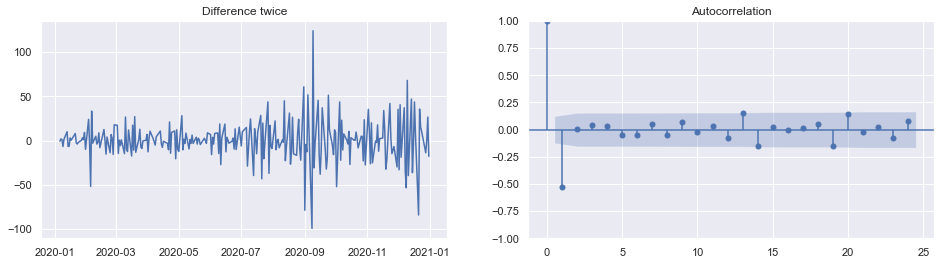

In [28]:
diff2 = df.TSLA.diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff2)
ax1.set_title("Difference twice")
plot_acf(diff2, ax=ax2)
plt.show()

In [53]:
from pmdarima.arima import auto_arima

In [61]:
model = auto_arima(
    df[:int(len(df)*0.7)].pct_change().dropna(),
    start_p=1,
    start_q=1,
    test="adf",
    max_p=6,
    max_q=6,
    m=1,  # frequency of series
    d=None,  # determine 'd'
    seasonal=True,  # no seasonality
    trace=True,
    stepwise=True,
)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-469.244, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-473.235, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-471.245, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-471.244, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-469.845, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.201 seconds


/opt/miniconda3/envs/mlenv310/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/miniconda3/envs/mlenv310/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/miniconda3/envs/mlenv310/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/miniconda3/envs/mlenv310/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


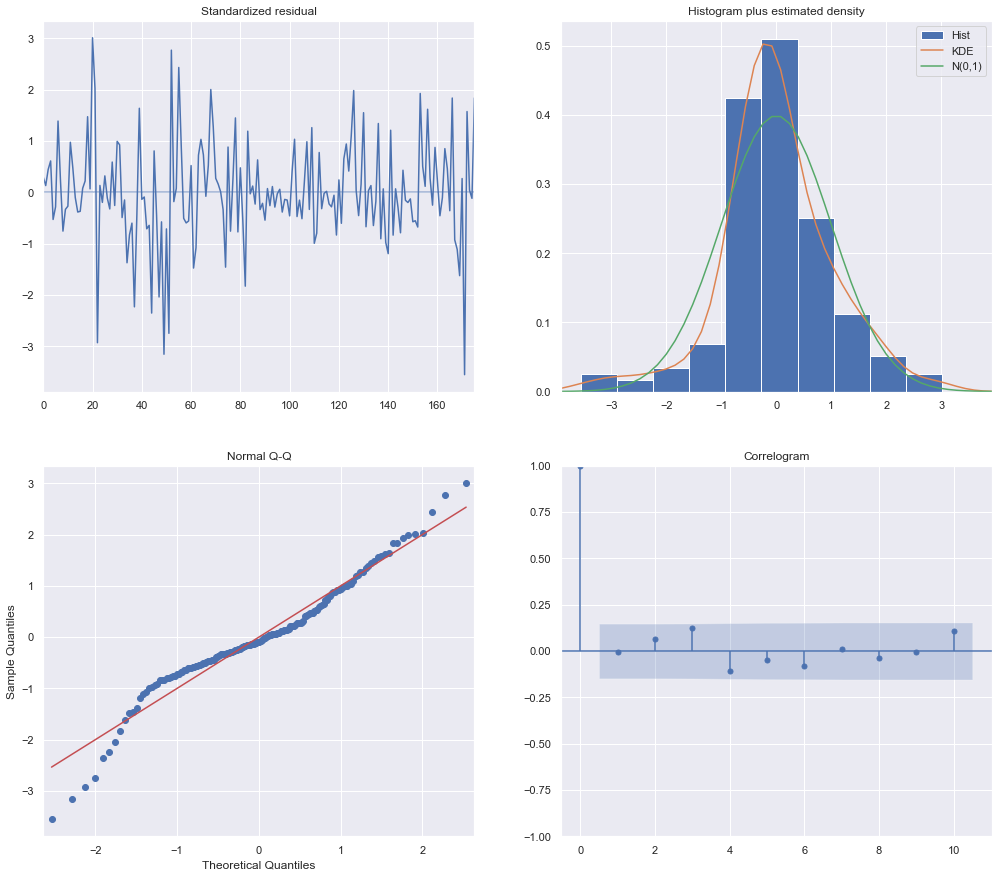

In [62]:
model.plot_diagnostics(figsize=(17,15))
plt.show()

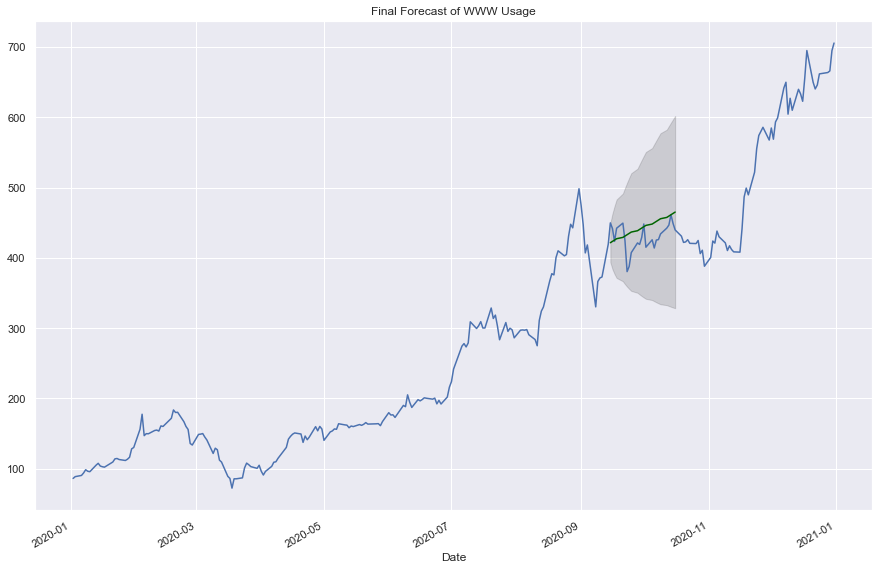

In [56]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)

index_of_fc = df[int(len(df)*0.7):].index[:n_periods]

# # make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
df.TSLA.plot(figsize=(15,10))
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

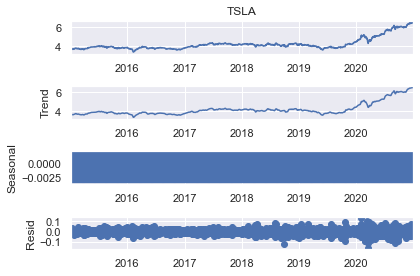

In [105]:
close = df['TSLA'].resample('D').mean()

# The term bfill means that we use the value before filling in missing values
close = close.fillna(close.bfill())
log_close = np.log(close)

sm.tsa.seasonal_decompose(log_close).plot()
plt.show()

In [96]:
df.TSLA

Date
2015-01-05     42.018002
2015-01-06     42.256001
2015-01-07     42.189999
2015-01-08     42.124001
2015-01-09     41.332001
                 ...    
2020-12-24    661.770020
2020-12-28    663.690002
2020-12-29    665.989990
2020-12-30    694.780029
2020-12-31    705.669983
Name: TSLA, Length: 1510, dtype: float64

## LSTM

In [ ]:
# Importation
import os
import matplotlib.pyplot as plt
import pandas as pd
import LSTM_Prep

# Data
# dat = pd.read_csv('forex.csv')

split = 0.8
sequence_length = 60

data_prep = LSTM_Prep.Data_Prep(dataset = dat)
rnn_df, validation_df = data_prep.preprocess_rnn(date_colname = 'date', numeric_colname = 'perc', pred_set_timesteps = 60)


series_prep = LSTM_Prep.Series_Prep(rnn_df =  rnn_df, numeric_colname = 'perc')
window, X_min, X_max = series_prep.make_window(sequence_length = sequence_length, 
                                               train_test_split = split, 
                                               return_original_x = True)

X_train, X_test, y_train, y_test = series_prep.reshape_window(window, train_test_split = split)


# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ #
#                 Building the LSTM
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ #
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import ReduceLROnPlateau #Learning rate scheduler for when we reach plateaus
rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=100)

# Reset model if we want to re-train with different splits
def reset_weights(model):
    import keras.backend as K
    session = K.get_session()
    for layer in model.layers: 
        if hasattr(layer, 'kernel_initializer'): 
            layer.kernel.initializer.run(session=session)
        if hasattr(layer, 'bias_initializer'):
            layer.bias.initializer.run(session=session)  


# Epochs and validation split
EPOCHS = 201
validation = 0.05

# Instantiate the model
model = Sequential()

# Add the first layer.... the input shape is (Sample, seq_len-1, 1)
model.add(LSTM(
        input_shape = (sequence_length-1, 1), return_sequences = True,
        units = 100))

# Add the second layer.... the input shape is (Sample, seq_len-1, 1)
model.add(LSTM(
        input_shape = (sequence_length-1, 1), 
        units = 100))

# Add the output layer, simply one unit
model.add(Dense(
        units = 1,
        activation = 'sigmoid'))

model.compile(loss = 'mse', optimizer = 'adam')


# History object for plotting our model loss by epoch
history = model.fit(X_train, y_train, epochs = EPOCHS, validation_split = validation,
          callbacks = [rlrop])
# Loss History
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ #
#              Predicting the future
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ #
# Creating our future object
future = LSTM_Prep.Predict_Future(X_test  = X_test, validation_df = validation_df, lstm_model = model)
# Checking its accuracy on our training set
future.predicted_vs_actual(X_min = X_min, X_max = X_max, numeric_colname = 'perc')
# Predicting 'x' timesteps out
future.predict_future(X_min = X_min, X_max = X_max, numeric_colname = 'perc', timesteps_to_predict = 15, return_future = True)